# Analyzing Motifs and Anomalies with STUMP

In [2]:
import pandas as pd
import stumpy
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.patches import Rectangle
import datetime as dt
import tqdm
from statistics import *


import math
import scipy as sp
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import kpss

import warnings

In [56]:
# Path
new = pd.DataFrame()
path = pathlib.Path('./phase_2') / 'phase_2' 
for path in sorted(path.iterdir()):
    data = np.loadtxt(path)
    
    number = path.stem.split('_')[1]
    EndOfTrainingIndex = int(path.stem.split('_')[-1])
    id = int(path.stem.split('_')[0])
    column_name= str(id) +'_'+number
    df_data = pd.DataFrame (data, columns = [column_name])
    new = pd.concat([new, df_data], axis=1) 
    print( "file id: ",id, len(df_data))
    

file id:  1 79795
file id:  2 80001
file id:  4 11000
file id:  6 8184
file id:  7 8184
file id:  8 8184
file id:  10 8184
file id:  11 30000
file id:  12 30000
file id:  13 30000
file id:  14 30000
file id:  16 30000
file id:  17 30000
file id:  18 30000
file id:  19 12000
file id:  20 12000
file id:  21 12000
file id:  22 12000
file id:  23 12000
file id:  24 7501
file id:  26 7601
file id:  27 7501
file id:  28 7500
file id:  29 7500
file id:  30 7500
file id:  31 7500
file id:  32 7321
file id:  33 7415
file id:  34 7654
file id:  36 7501
file id:  37 30001
file id:  38 29950
file id:  39 29950
file id:  40 30066
file id:  41 29826
file id:  42 29859
file id:  43 24667
file id:  44 29931
file id:  45 29931
file id:  46 29931
file id:  47 29931
file id:  48 11334
file id:  49 11406
file id:  51 11388
file id:  52 11308
file id:  53 6684
file id:  55 38501
file id:  56 38379
file id:  57 38269
file id:  58 38501
file id:  60 65000
file id:  63 64000
file id:  64 64000
file id:  65 10

In [37]:
df=new.iloc[:1000,:].copy()
import seaborn as sns

In [38]:
#drawing one figure with title and 3 axes below each other. Size and resolution are specified
f, axes = plt.subplots(3,1,figsize=(18,12),dpi=600,sharex=True)
plt.suptitle('Comparison of unscaled features at different scales',fontsize=22);

#drawing boxplots of three different scales, each to separate axis
sns.boxplot(data=df.iloc[:,1:26], ax=axes[0])
sns.boxplot(data=df.iloc[:,1:26], ax=axes[1]).set(ylim=(-15,50))
sns.boxplot(data=df.iloc[:,1:26], ax=axes[2]).set(ylim=(-10,10))

#rotating ticks of the shared x axis by 90 degrees. The shared x axis is located on axes[2]
for tick in axes[2].get_xticklabels():
        tick.set_rotation(90);

#setting y axis labels for each axis
for a in axes:
    a.set_ylabel('Unscaled values');

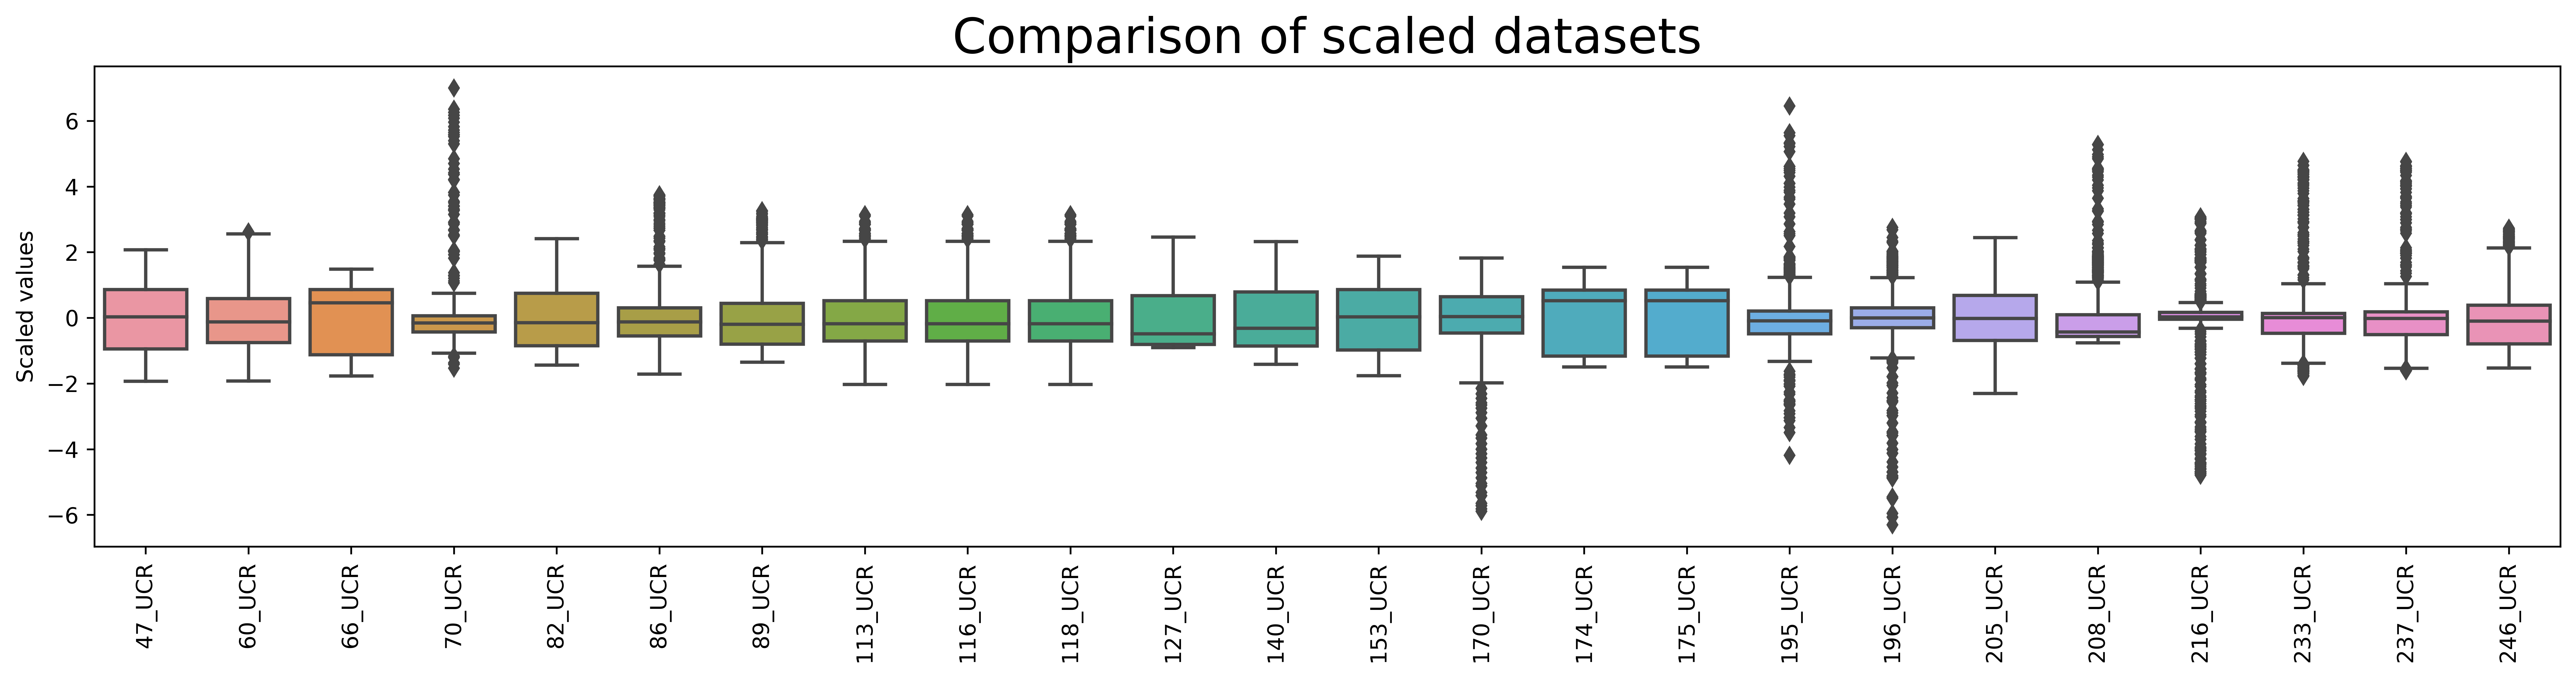

In [175]:
#creating new dataframe for scaled feature values by first copying the original dataframe
df_features_scaled = df.iloc[:,1:50].copy()

#substituting unscaled feature values by scaled values using sklearn StandardScaler
scaler = StandardScaler()
df_features_scaled.iloc[:,:] = scaler.fit_transform(df_features_scaled.iloc[:,:])

#drawing figure with title and single axis. Size and resolution are specified
plt.figure(figsize=(20,4),dpi=600);
plt.title('Comparison of scaled datasets',fontsize=22);

#setting y axis label
plt.ylabel('Scaled values');

#rotating x axis ticks by 90 degrees
plt.xticks(rotation=90);

#drawing boxplot of scaled feature values
sns.boxplot(data=df_features_scaled);

# Stationarity of a Time Series
There are three basic criterion for a time series to understand whether it is stationary series or not.
Statistical properties of time series such as mean, variance should remain constant over time to call time series is stationary
- constant mean
- constant variance

autocovariance that does not depend on time. autocovariance is covariance between time series and lagged time series.
#### Lets visualize and check seasonality trend of our time series.

In [42]:
ts=new.iloc[:,:1].dropna()

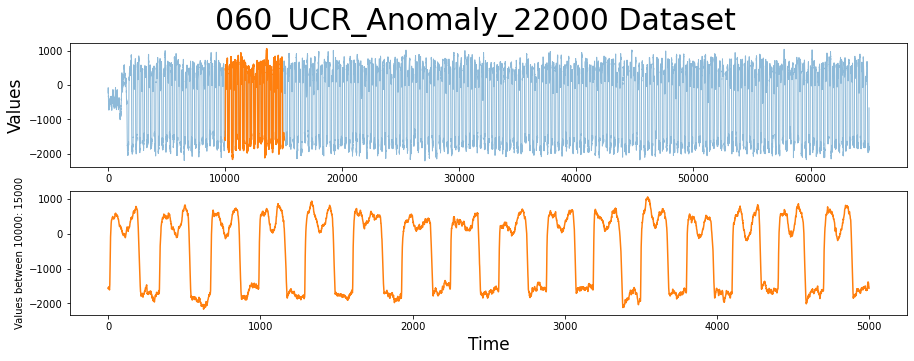

In [89]:
import pathlib
path = pathlib.Path('./phase_1/phase_1/060_UCR_Anomaly_22000.txt') 
data = np.loadtxt(path)
ts = pd.DataFrame (data, columns = ['060_UCR'])

from matplotlib.patches import Rectangle
fig, axs = plt.subplots(2,figsize=(15,5))
plt.suptitle('060_UCR_Anomaly_22000 Dataset', fontsize='30')
axs[0].set_ylabel("Values", fontsize='17')
axs[0].plot(ts, alpha=0.5, linewidth=1)
axs[0].plot(ts.iloc[10000:15000])

axs[1].set_xlabel("Time", fontsize='17')
axs[1].set_ylabel("Values between 10000: 15000", fontsize='10')
axs[1].plot(ts.values[10000: 15000], color='C1')

plt.show()

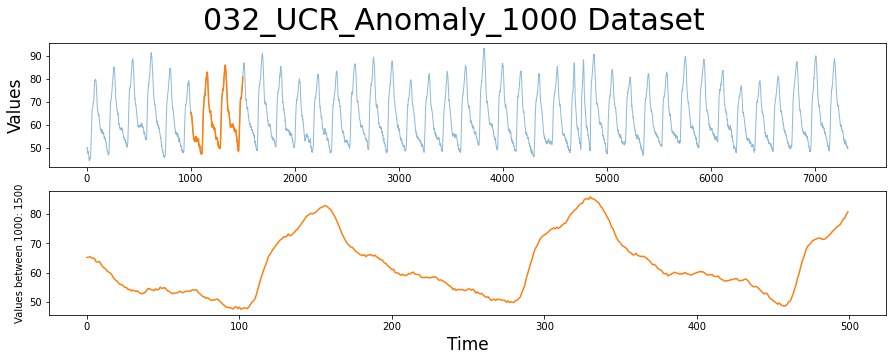

In [90]:
path = pathlib.Path('./phase_1/phase_1/032_UCR_Anomaly_1000.txt') 

data = np.loadtxt(path)
ts = pd.DataFrame (data, columns = ['032_UCR'])

from matplotlib.patches import Rectangle
fig, axs = plt.subplots(2,figsize=(15,5))
plt.suptitle('032_UCR_Anomaly_1000 Dataset', fontsize='30')
axs[0].set_ylabel("Values", fontsize='17')
axs[0].plot(ts, alpha=0.5, linewidth=1)
axs[0].plot(ts.iloc[1000:1500])

axs[1].set_xlabel("Time", fontsize='17')
axs[1].set_ylabel("Values between 1000: 1500", fontsize='10')
axs[1].plot(ts.values[1000: 1500], color='C1')

plt.show()

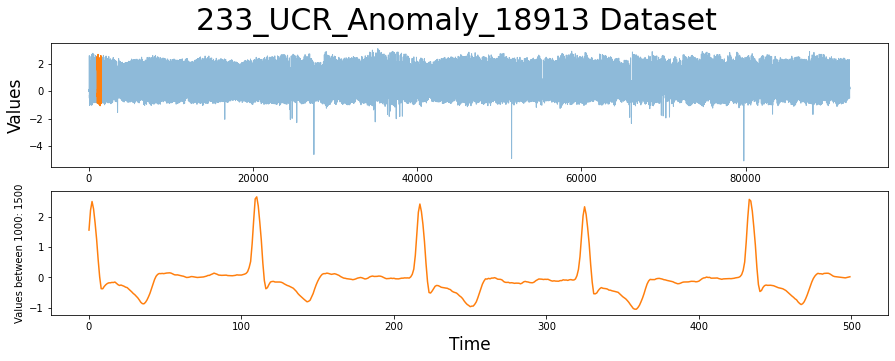

In [91]:
path = pathlib.Path('./phase_1/phase_1/233_UCR_Anomaly_18913.txt') 

data = np.loadtxt(path)
ts = pd.DataFrame (data, columns = ['233_UCR'])

from matplotlib.patches import Rectangle
fig, axs = plt.subplots(2,figsize=(15,5))
plt.suptitle('233_UCR_Anomaly_18913 Dataset', fontsize='30')
axs[0].set_ylabel("Values", fontsize='17')
axs[0].plot(ts, alpha=0.5, linewidth=1)
axs[0].plot(ts.iloc[1000:1500])

axs[1].set_xlabel("Time", fontsize='17')
axs[1].set_ylabel("Values between 1000: 1500", fontsize='10')
axs[1].plot(ts.values[1000: 1500], color='C1')

plt.show()

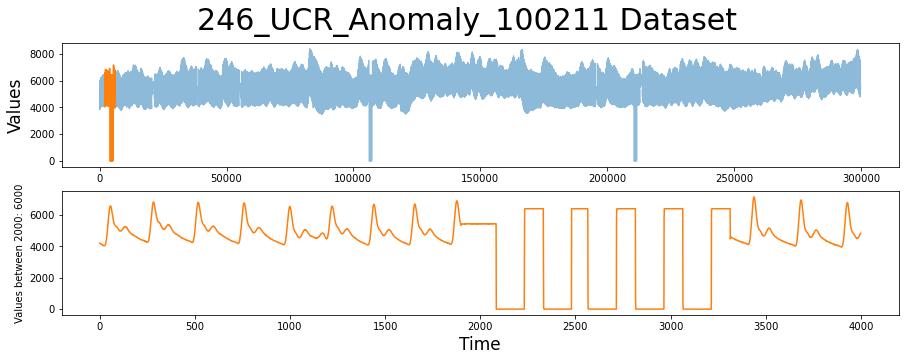

In [92]:
path = pathlib.Path('./phase_1/phase_1/246_UCR_Anomaly_100211.txt') 

data = np.loadtxt(path)
ts = pd.DataFrame (data, columns = ['246_UCR'])

from matplotlib.patches import Rectangle
fig, axs = plt.subplots(2,figsize=(15,5))
plt.suptitle('246_UCR_Anomaly_100211 Dataset', fontsize='30')
axs[0].set_ylabel("Values", fontsize='17')
axs[0].plot(ts, alpha=0.5, linewidth=1)
axs[0].plot(ts.iloc[2000:6000])

axs[1].set_xlabel("Time", fontsize='17')
axs[1].set_ylabel("Values between 2000: 6000", fontsize='17')
axs[1].plot(ts.values[2000: 6000], color='C1')

plt.show()

Now lets check stationary of time series. We can check stationarity using the following methods:


- Plotting Rolling Statistics: We have a window lets say window size is 6 and then we find rolling mean and variance to check stationary.
- Dickey-Fuller Test: The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the test statistic is less than the critical value, we can say that time series is stationary.

In [165]:
path = pathlib.Path('./phase_1/phase_1/032_UCR_Anomaly_1000.txt') 
data = np.loadtxt(path)
data = pd.DataFrame (data, columns = ['032_UCR'])
ts=data[1000: 5000]
# adfuller library 
from statsmodels.tsa.stattools import adfuller
# check_adfuller
def check_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])
# check_mean_std
def check_mean_std(ts):
    #Rolling statistics
    rolmean = ts.rolling(6).mean()
    rolstd = ts.rolling(6).std()
    plt.figure(figsize=(15,5))   
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Values")
    plt.title('Rolling Mean & Standard Deviation for 032_UCR train',fontsize='20')
    plt.legend()
    plt.show()
    


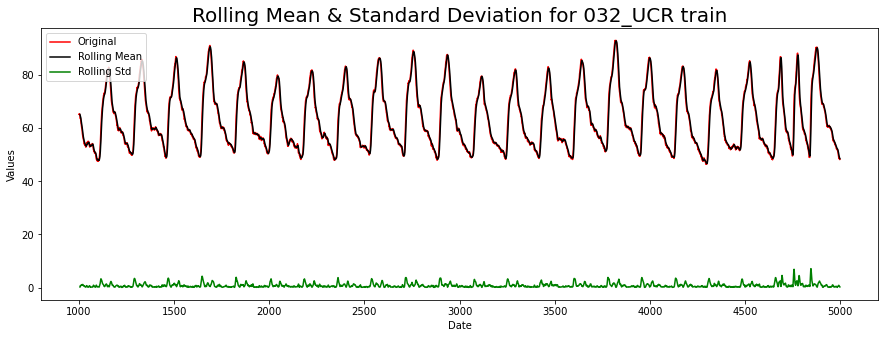

In [166]:
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts)

In [167]:
check_adfuller(ts)

Test statistic:  -11.559964873151502
p-value:  3.288383868837937e-21
Critical Values: {'1%': -3.431998660700255, '5%': -2.862268488110152, '10%': -2.567157782246144}


- Our first criteria for stationary is constant mean. So we fail because mean is not constant as you can see from plot(black line) above . (no stationary)
- Second one is constant variance. It looks like constant. (yes stationary)

- Third one is that If the test statistic is less than the critical value, we can say that time series is stationary. Lets look:
test statistic = -19 and critical values = {'1%': -3.439229783394421, '5%': -2.86545894814762, '10%': -2.5688568756191392}. Test statistic is smaller than the critical values. ( stationary)

As a result, we sure that our time series is not stationary. Lets make time series stationary at the next part.


### Make a Time Series Stationary?
As we mentioned before, there are 2 reasons behind non-stationarity of time series
- Trend: varying mean over time. We need constant mean for stationary of time series.
- Seasonality: variations at specific time. We need constant variations for stationary of time series.

First solve trend(constant mean) problem: Most popular method is moving average.
Moving average: We have window that take the average over the past 'n' sample. 'n' is window size.

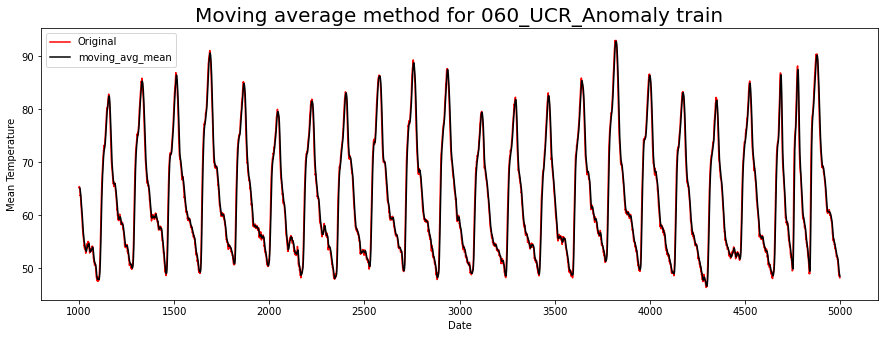

In [170]:
# Moving average method
window_size = 6
moving_avg = ts.rolling(window_size).mean()
plt.figure(figsize=(15,5))
plt.plot(ts, color = "red",label = "Original")
plt.plot(moving_avg, color='black', label = "moving_avg_mean")
plt.title("Moving average method for 060_UCR_Anomaly train",fontsize='20')
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()

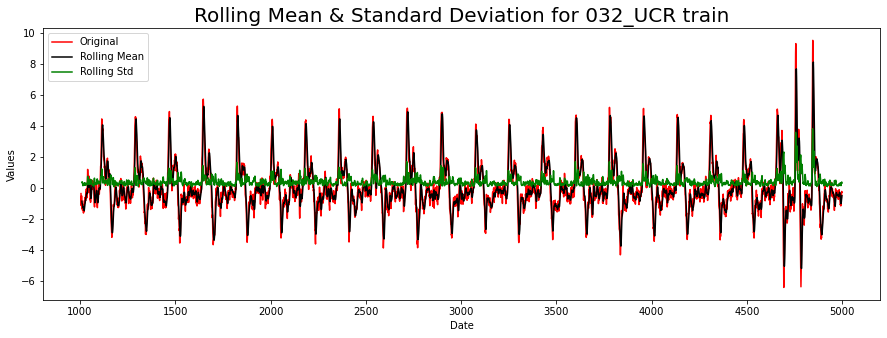

In [169]:
ts_moving_avg_diff = ts- moving_avg
ts_moving_avg_diff.dropna(inplace=True) # first 6 is nan value due to window size    
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_moving_avg_diff)

- Constant mean criteria: mean looks like constant as you can see from plot(black line) above . (yes stationary)
- Second one is constant variance. It looks like constant. (yes stationary)
- The test statistic is smaller than the 1% critical values so we can say with 99% confidence that this is a stationary series. (yes stationary)

We achieve stationary time series. However lets look at one more method to avoid trend and seasonality.


Differencing method: It is one of the most common method. Idea is that take difference between time series and shifted time series.

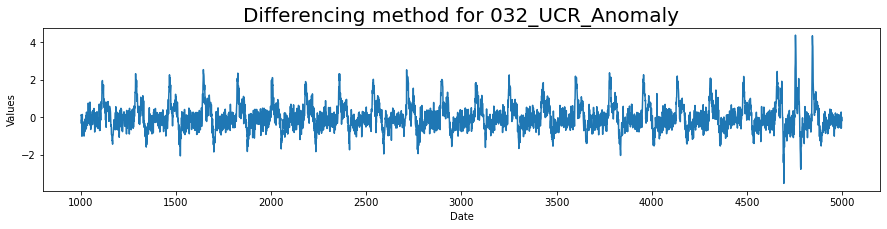

In [174]:
# differencing method
ts_diff = ts - ts.shift()
plt.figure(figsize=(15,3))
plt.plot(ts_diff)
plt.title("Differencing method for 032_UCR_Anomaly",fontsize='20') 
plt.xlabel("Date")
plt.ylabel("Values")
plt.show()

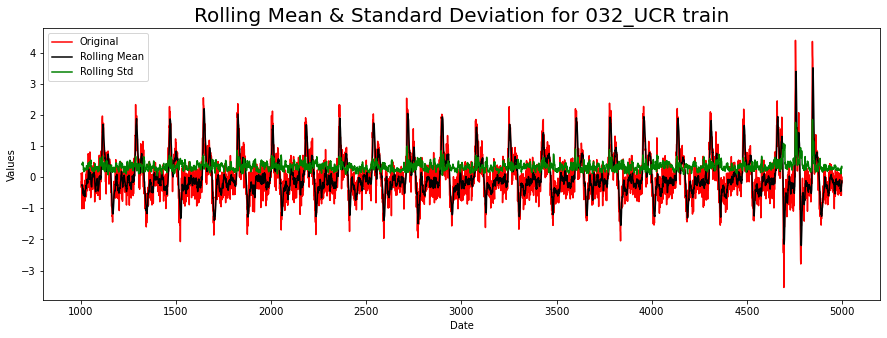

In [173]:
ts_diff.dropna(inplace=True) # due to shifting there is nan values
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_diff)

In [132]:
check_adfuller(ts_diff)

Test statistic:  -27.88938164723393
p-value:  0.0
Critical Values: {'1%': -3.4306943652098805, '5%': -2.861692196874841, '10%': -2.5668510103151}


- Constant mean criteria: mean looks like constant as you can see from plot(black line) above . (yes stationary)
- Second one is constant variance. It looks like constant. (yes stationary)
- The test statistic is smaller than the 1% critical values so we can say with 99% confidence that this is a stationary series. (yes stationary)

In [113]:
# Importing everything from above

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

we will assume that the future value of our variable depends on the average of its  k  previous values. Therefore, we will use the moving average.

y^t=1k∑n=1kyt−n

Unfortunately, we cannot make predictions far in the future -- in order to get the value for the next step, we need the previous values to be actually observed. But moving average has another use case - smoothing the original time series to identify trends. Pandas has an implementation available with DataFrame.rolling(window).mean(). The wider the window, the smoother the trend. In the case of very noisy data, which is often encountered in finance, this procedure can help detect common patterns.

In [114]:
def moving_average(series, n):
    """
        Calculate average of last n observations
    """
    return np.average(series[-n:])

moving_average(ts, 24) # prediction for the last observed day (past 24 hours)

50.912519083333336

Now, let's create a simple anomaly detection system with the help of moving average. Unfortunately, in this particular dataset, everything is more or less normal, so we will intentionally make one of the values abnormal in our dataframe ads_anomaly.

Weighted average is a simple modification to the moving average. The weights sum up to 1 with larger weights assigned to more recent observations.

y^t=∑n=1kωnyt+1−n

In [115]:
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(8,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

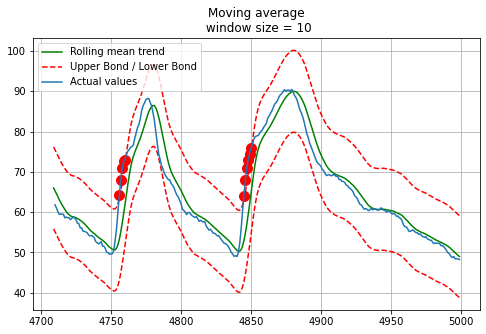

In [116]:
plotMovingAverage(ts[3700:5000], 10, plot_intervals=True, plot_anomalies=True)

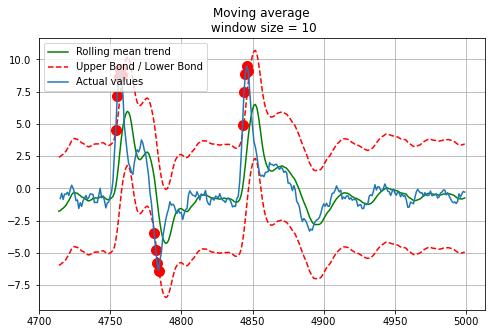

In [85]:
plotMovingAverage(ts_moving_avg_diff[3700:5000], 10, plot_intervals=True, plot_anomalies=True)

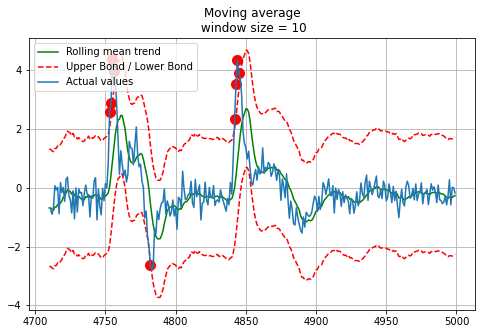

In [86]:
plotMovingAverage(ts_diff[3700:5000], 10, plot_intervals=True, plot_anomalies=True)

In [68]:
results_eval = pd.read_csv('./metadata.csv')
results_eval

,data_id,name,train_end_idx,anomaly_start,anomaly_end
0,1,DISTORTED1sddb40,35000,52000,52620
1,2,DISTORTED2sddb40,35000,56600,56900
2,3,DISTORTED3sddb40,35000,46600,46900
3,4,DISTORTEDBIDMC1,2500,5400,5600
4,5,DISTORTEDCIMIS44AirTemperature1,4000,5391,5392
...,...,...,...,...,...
245,246,tilt12755mtable,100211,270800,271070
246,247,tilt12755mtable,50211,121900,121980
247,248,weallwalk,2000,4702,4707
248,249,weallwalk,2753,8285,8315


In [85]:
df_new2 = results_eval.replace('/^DISTORTED1sddb.*/', 'DISTORTED1sddb', regex=True)
df_new2

,data_id,name,train_end_idx,anomaly_start,anomaly_end
0,1,DISTORTED1sddb40,35000,52000,52620
1,2,DISTORTED2sddb40,35000,56600,56900
2,3,DISTORTED3sddb40,35000,46600,46900
3,4,DISTORTEDBIDMC1,2500,5400,5600
4,5,DISTORTEDCIMIS44AirTemperature1,4000,5391,5392
...,...,...,...,...,...
245,246,tilt12755mtable,100211,270800,271070
246,247,tilt12755mtable,50211,121900,121980
247,248,weallwalk,2000,4702,4707
248,249,weallwalk,2753,8285,8315


In [ ]:
results_eval['name'].value_counts()[:50].plot(kind='bar',figsize=(15,2))

<AxesSubplot:>

In [21]:
txt_filepath=pathlib.Path('./phase_1/phase_1/060_UCR_Anomaly_22000.txt')
X = np.loadtxt(txt_filepath)
# Display results
data_df = pd.DataFrame(X, columns=['steam flow'])

#steam_df = pd.read_csv("https://zenodo.org/record/4273921/files/STUMPY_Basics_steamgen.csv?download=1")

data_df.head()

,steam flow
0,-226.21212
1,-199.11885
2,-157.65950
3,-172.38922
4,-158.94077


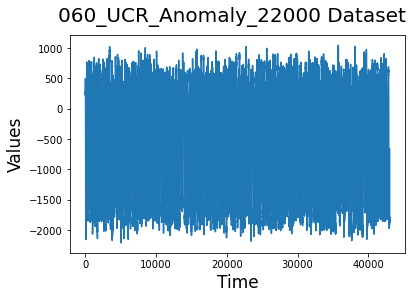

In [26]:
plt.suptitle('060_UCR_Anomaly_22000 Dataset', fontsize='20')
plt.xlabel('Time', fontsize ='17')
plt.ylabel('Values', fontsize='17')
plt.plot(data_df[22000:].values)
plt.show()

## Find a Motif Using STUMP 

In [117]:
import pathlib
path = pathlib.Path('./phase_1/phase_1/060_UCR_Anomaly_22000.txt') 

data = np.loadtxt(path)
data_df = pd.DataFrame (data, columns = ['column_name'])
data_df

,column_name
0,-226.21212
1,-199.11885
2,-157.65950
3,-172.38922
4,-158.94077
...,...
64995,-1862.50100
64996,-1641.07570
64997,-1393.62600
64998,-1017.73750


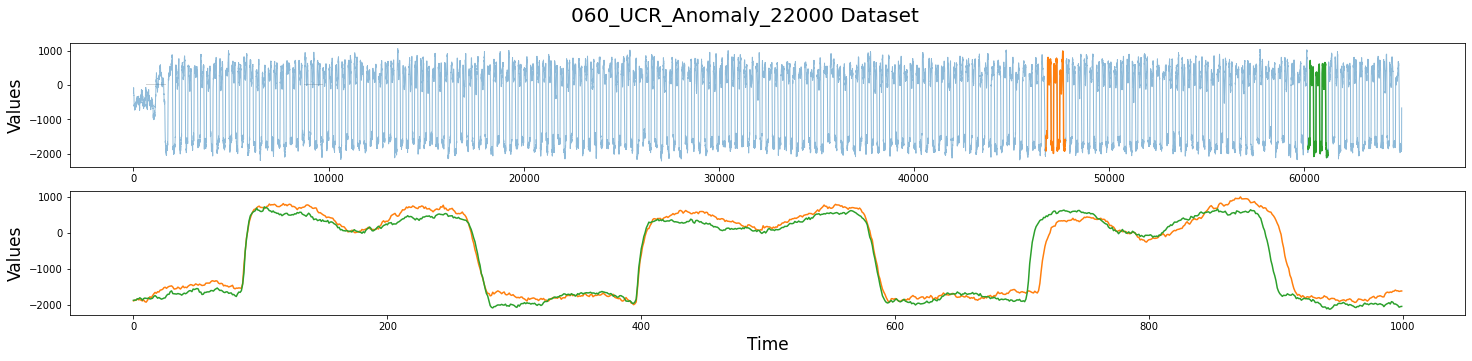

In [118]:
m = 1000
fig, axs = plt.subplots(2,figsize=(25,5))
plt.suptitle('060_UCR_Anomaly_22000 Dataset', fontsize='20')
axs[0].set_ylabel("Values", fontsize='17')
axs[0].plot(data_df, alpha=0.5, linewidth=1)
axs[0].plot(data_df.iloc[46757:46757+m])
axs[0].plot(data_df.iloc[60210:60210+m])
rect = Rectangle((643, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((8724, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel("Time", fontsize='17')
axs[1].set_ylabel("Values", fontsize='17')
axs[1].plot(data_df.values[46757:46757+m], color='C1')
axs[1].plot(data_df.values[60210:60210+m], color='C2')
plt.show()

The motif (pattern) that we are looking for is highlighted in this figure. We can notice that the orange and green subsequences are a match (upper panel) when we overlay the subsequences on top each other (lower panel).

The fundamental value of computing the matrix profile is that it not only allows you to quickly find motifs but it also identifies the nearest neighbor for all subsequences within your time series. Note that we haven’t actually done anything special here to locate the motif except that we grab the locations from the original paper and plotted them. Now, let’s take our steamgen data and apply the stumpy.stump() function to it:

stump requires two parameters:
- A time series
- A window size, m

In this case, based on the previous figure, we’ve chosen m = 300, which is roughly equivalent to the last arbtrary windows divided by three. And, again, the output of stump is an array that contains all of the matrix profile values (i.e., z-normalized Euclidean distance to your nearest neighbor) and matrix profile indices in the first and second columns, respectively (we’ll ignore the third and fourth columns for now). 

To identify the index location of the motif we’ll need to find the index location where the matrix profile, mp[:, 0], has the smallest value:

In [9]:
m = 300
mp = stumpy.stump(df_data['column_name'], m)

In [10]:
motif_idx = np.argsort(mp[:, 0])[0]

print(f"The motif is located at index {motif_idx}")

The motif is located at index 6668


With this motif_idx information, we can also identify the location of its nearest neighbor by cross-referencing the matrix profile indices, mp[:, 1]:

In [11]:
nearest_neighbor_idx = mp[motif_idx, 1]

print(f"The nearest neighbor is located at index {nearest_neighbor_idx}")

The nearest neighbor is located at index 23202


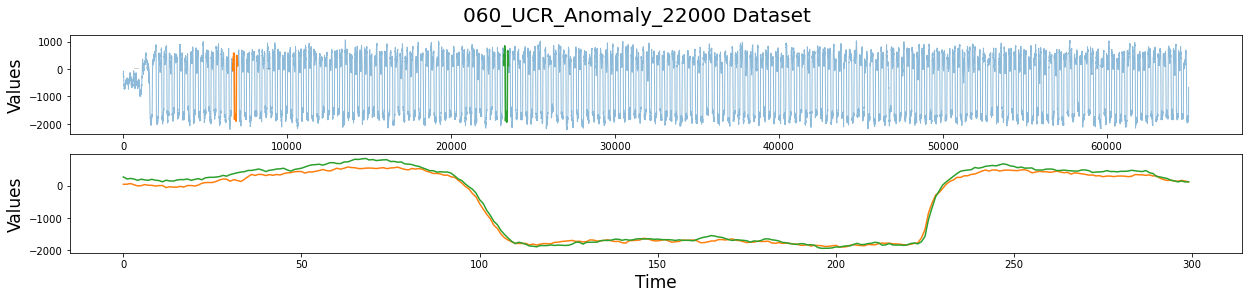

In [16]:
m = 300
fig, axs = plt.subplots(2,figsize=(21,4))
plt.suptitle('060_UCR_Anomaly_22000 Dataset', fontsize='20')
axs[0].set_ylabel("Values", fontsize='17')
axs[0].plot(data_df, alpha=0.5, linewidth=1)
axs[0].plot(data_df.iloc[6668:6668+m])
axs[0].plot(data_df.iloc[23202:23202+m])
rect = Rectangle((643, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((8724, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel("Time", fontsize='17')
axs[1].set_ylabel("Values", fontsize='17')
axs[1].plot(data_df.values[6668:6668+m], color='C1')
axs[1].plot(data_df.values[23202:23202+m], color='C2')
plt.show()

Now, let’s put all of this together and plot the matrix profile next to our raw data:

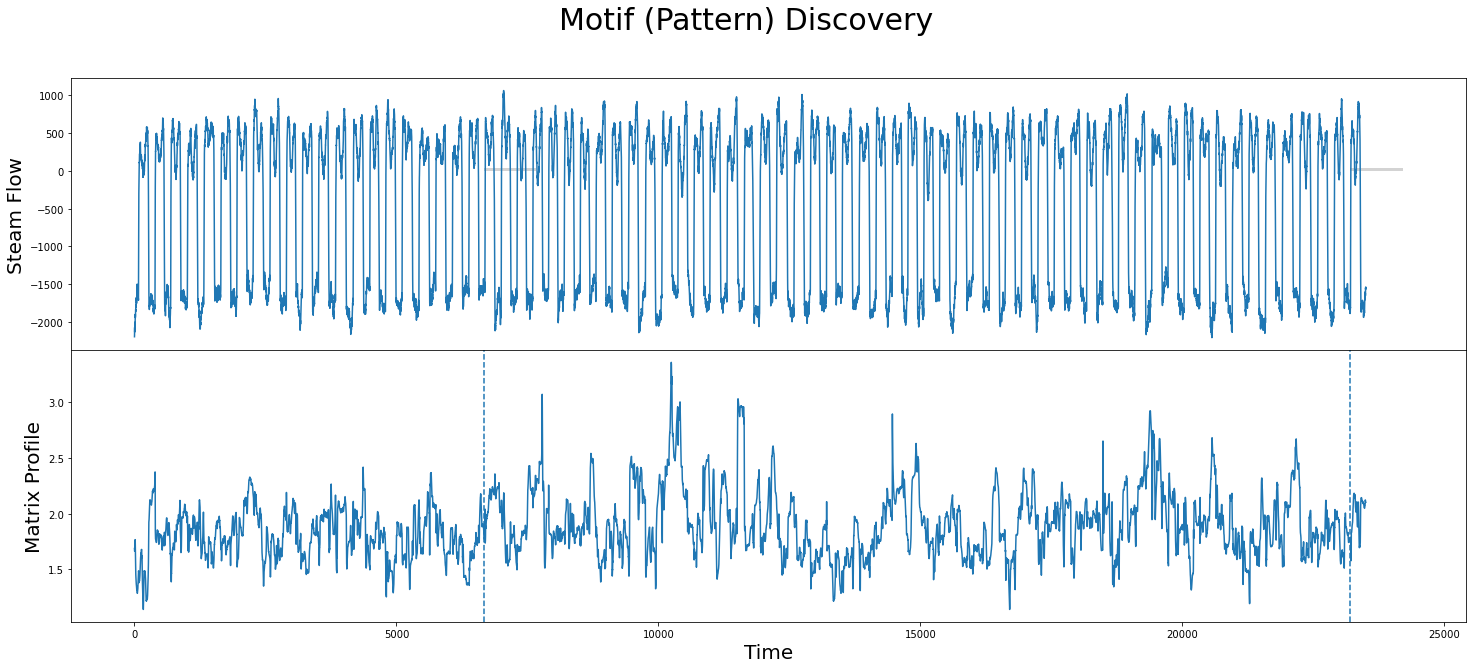

In [67]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0},figsize=(25,10))
plt.suptitle('Motif (Pattern) Discovery', fontsize='30')

axs[0].plot(df_data['column_name'].iloc[6500:30000].values)
axs[0].set_ylabel('Steam Flow', fontsize='20')
rect = Rectangle((motif_idx, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((nearest_neighbor_idx, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=motif_idx, linestyle="dashed")
axs[1].axvline(x=nearest_neighbor_idx, linestyle="dashed")
axs[1].plot(mp[6500:30000, 0])
plt.show()

In [64]:
mp[:, 0].min()

1.136923303036482

In [62]:
mp[6000:30000, 0]

array([1.566028856016667, 1.56692895348819, 1.5665851653731817, ...,
       2.1037965531314873, 2.1030921885823872, 2.1020100688961665],
      dtype=object)

# Find Potential Anomalies (Discords) using STUMP

In [50]:
discord_idx = np.argsort(mp[:, 0])[-1]

print(f"The discord is located at index {discord_idx}")

The discord is located at index 109


In [51]:
nearest_neighbor_distance = mp[discord_idx, 0]

print(f"The nearest neighbor subsequence to this discord is {nearest_neighbor_distance} units away")

The nearest neighbor subsequence to this discord is 17.21307804397274 units away


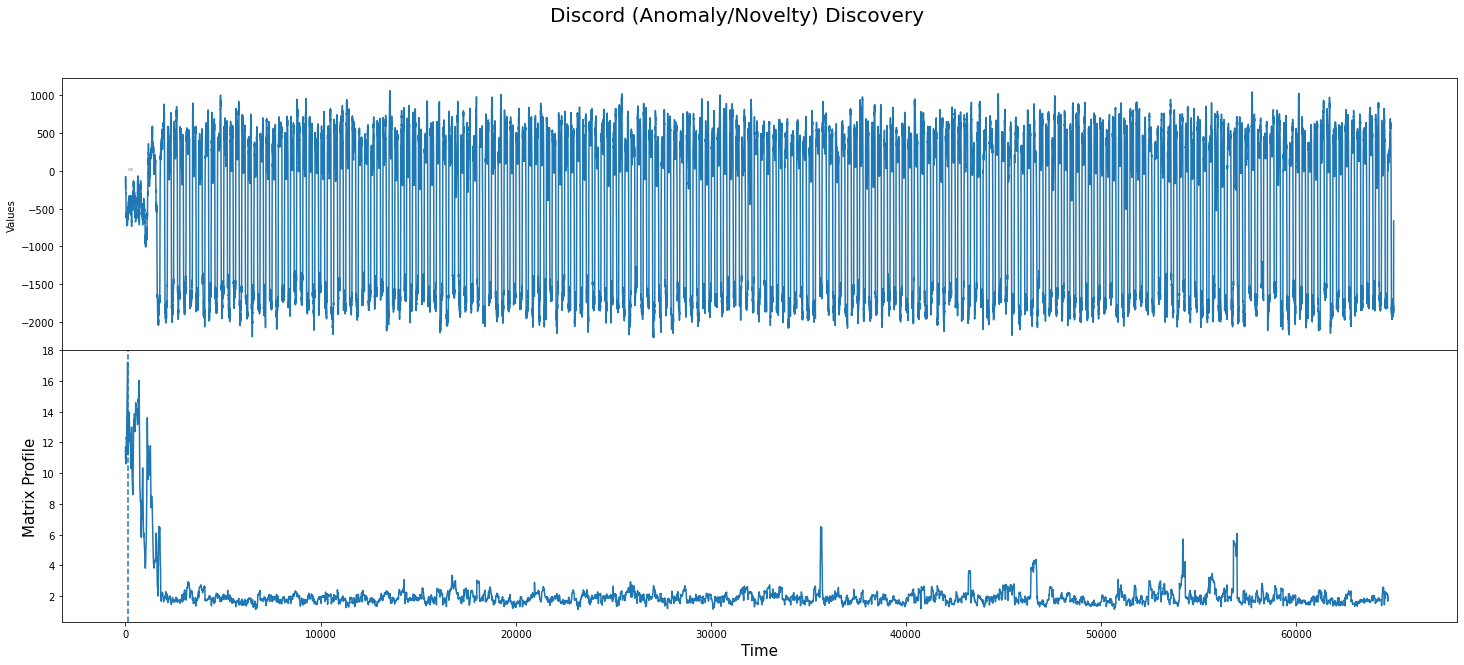

In [52]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0},figsize=(25,10))
plt.suptitle('Discord (Anomaly/Novelty) Discovery', fontsize='20')

axs[0].plot(df_data['column_name'].values)
axs[0].set_ylabel('Values', fontsize='10')
rect = Rectangle((discord_idx, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='15')
axs[1].set_ylabel('Matrix Profile', fontsize='15')
axs[1].axvline(x=discord_idx, linestyle="dashed")
axs[1].plot(mp[:, 0])
plt.show()

In [21]:
days_dict ={
  "Half-Day": 10,
  "1-Day":40,
  "2-Days": 90,
  "7-Days": 100,
  "2_weeks": 200
    
}
DAY_MULTIPLIER = 6  # Specify for the amount of days you want between each labeled x-axis tick

days_df = pd.DataFrame.from_dict(days_dict, orient='index', columns=['m'])
days_df

,m
Half-Day,10
1-Day,40
2-Days,90
7-Days,100
2_weeks,200


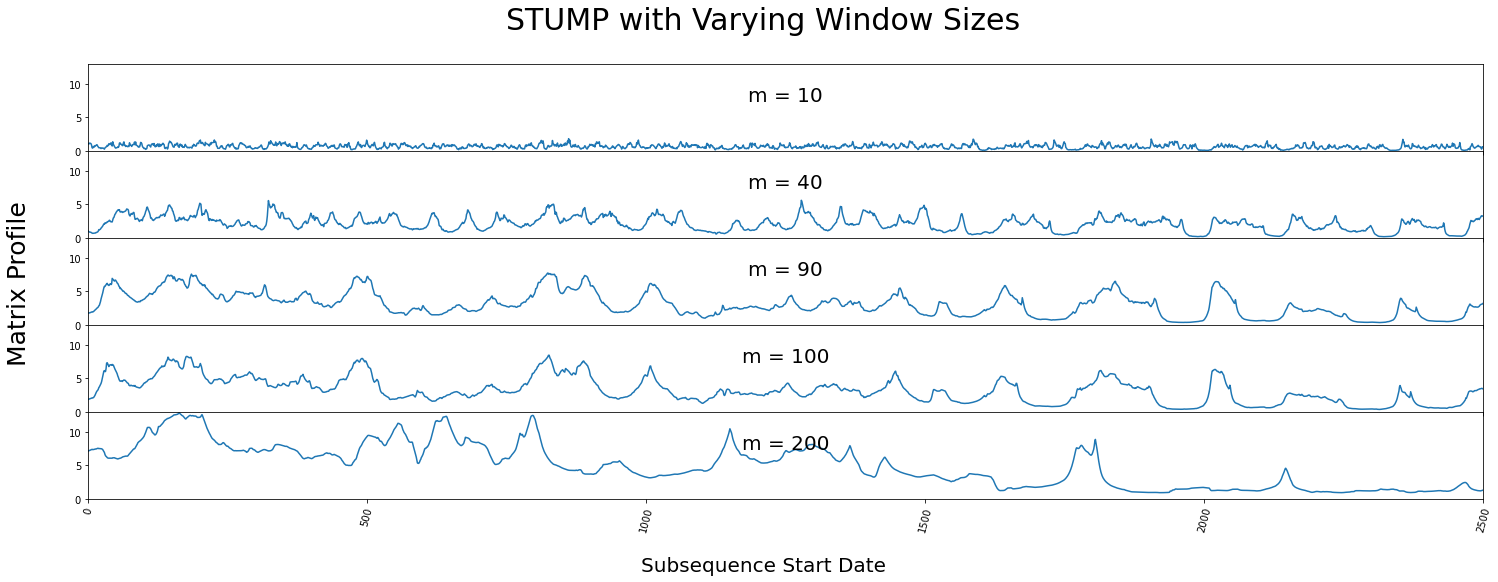

In [32]:
fig, axs = plt.subplots(5, sharex=True, gridspec_kw={'hspace': 0},figsize=(25,8))
fig.text(0.5, 0, 'Subsequence Start Date', ha='center', fontsize='20')
fig.text(0.08, 0.5, 'Matrix Profile', va='center', rotation='vertical', fontsize='25')
for i, varying_m in enumerate(days_df['m'].values):
    mp = stumpy.stump(df_data['column_name'], varying_m)
    axs[i].plot(mp[:, 0])
    axs[i].set_ylim(0,13)
    axs[i].set_xlim(0,3000)
    title = f"m = {varying_m}"
    axs[i].set_title(title, fontsize=20, y=.5)
#plt.xticks(np.arange(0, taxi_df.shape[0], (48*DAY_MULTIPLIER)/2), x_axis_labels)
plt.xticks(rotation=75)
plt.suptitle('STUMP with Varying Window Sizes', fontsize='30')
plt.show()

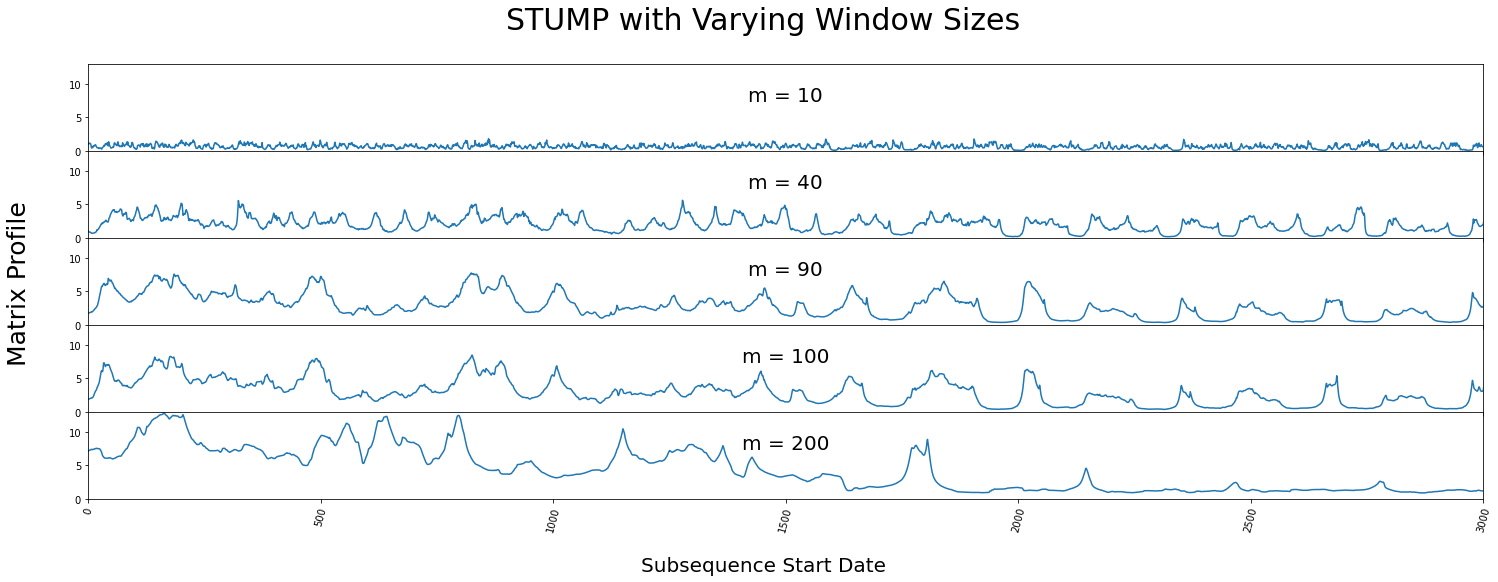

In [33]:
fig, axs = plt.subplots(5, sharex=True, gridspec_kw={'hspace': 0},figsize=(25,8))
fig.text(0.5, 0, 'Subsequence Start Date', ha='center', fontsize='20')
fig.text(0.08, 0.5, 'Matrix Profile', va='center', rotation='vertical', fontsize='25')
for i, varying_m in enumerate(days_df['m'].values):
    mp = stumpy.stump(df_data['column_name'], varying_m)
    axs[i].plot(mp[:, 0])
    axs[i].set_ylim(0,13)
    axs[i].set_xlim(0,3000)
    title = f"m = {varying_m}"
    axs[i].set_title(title, fontsize=20, y=.5)
#plt.xticks(np.arange(0, taxi_df.shape[0], (48*DAY_MULTIPLIER)/2), x_axis_labels)
plt.xticks(rotation=75)
plt.suptitle('STUMP with Varying Window Sizes', fontsize='30')
plt.show()

# Method to calculate window size from a time series input


In [5]:
from statsmodels.tsa.stattools import adfuller
from scipy.fftpack import fft,ifft

def cal_window_size(timeseries):
    yf = abs(fft(timeseries))  
    yfnormlize = yf / len(timeseries)  
    yfhalf = yfnormlize[range(int(len(timeseries) / 2))]  
    yfhalf = yfhalf * 2   

    xf = np.arange(len(timeseries))
    xhalf = xf[range(int(len(timeseries) / 2))]  

    max_value_idx = -1
    max_value = 0
    for idx, value in enumerate(yfhalf):
        if idx == 0:
            continue
        if (value > max_value):
            max_value = value
            max_value_idx = idx

    window_size = len(timeseries) / max_value_idx
    return int(window_size)

In [6]:
# Path
k = 30
path = pathlib.Path('./phase_2') / 'phase_2' 
df = pd.DataFrame(columns=['id','Discords'])

for path in sorted(path.iterdir()):

    data = np.loadtxt(path)
    df_data = pd.DataFrame (data, columns = ['column_name'])
   
    window_size=cal_window_size(df_data)
    print(window_size)
    if window_size<4:
        window_size=10

2
2
2
3
3
3
2
2
10
7
4
4
4
5
5
4
5
6
5
3
2
2
2
2
11
2
11
20
6
6
5
63
6
6
71
5
2
3
71
71
71
4
2
2
15
2
9
9
5
9
2
3
3
20
3
5
3
2
37
4
2
6
2
24
6
3
3
3
8
41
6
1250
1250
364
2
4
7
10
6
2
15
2
5
2
2
2
2
3
3
3
3
3
3
2
2
4
25
4
4
4
2
2
2
2
21
11
11
4
20
3
6
6
6
6
6
2
71
71
71
71
10
10
10
2
2
9
9
9
9
2
2
2
3
3
3
20
20
20
5
2
37
2
6
24
25
25
23
24
24
87
2
2
6
1250
1238
1245
5
28
5
24
766
5
4
16
6
71
73
2
2
19
3
2
3
3
4
22
2746
11
2059
11
18
180
3
3
3
3
8
22
2
2
897667
5844
900000
3
2
2
2
3
2
2
